# Case Study : Telecom Customer Defection #Analysis or telecom_churn

In [1]:
#Work on dataset Telecomm_churn.csv

In [2]:
#Customer Defection means customer churn  means is 
#the loss of clients or customer means Predict Wheather the customer use
#in this telecom service  or left the service of telecom

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#to load the dataset
df=pd.read_csv("/content/sample_data/telecom_churn.csv")
#to show first 5 records
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 row

In [5]:
pd.set_option('display.max_columns',None) #To show all columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#to show no. of rows and columns
df.shape

(7043, 21)

In [7]:
#we have classification dataset means apply classification algorithm means 
#to predict Either customer left the service or not of telecomm

In [8]:
#apply basic steps of EDA 
#To delete unwanted column customerID  from dataset permanently
df.drop("customerID",axis=1,inplace=True)

In [9]:
#check null values in dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
#why show TotalCharges column is object type ?
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
19.9       8
19.65      8
          ..
1071.6     1
2928.5     1
231.8      1
5459.2     1
97.1       1
Name: TotalCharges, Length: 6531, dtype: int64

In [12]:
#Replace space of df["TotalCharges"] with null values in dataset df permanent
df["TotalCharges"].replace(" ",np.nan,inplace=True)

In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#To change the datatype of TotalCharges column
df["TotalCharges"]=df["TotalCharges"].astype("float")
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
#find the percentage of null values of column TotalCharges
df["TotalCharges"].isnull().sum()*100/df.shape[0] 

#where df.shape[0]  : total no. of records

0.15618344455487718

In [16]:
#fill null values of TotalCharges with mean of itself column TotalCharges
#Permanently
m=df["TotalCharges"].mean()
df["TotalCharges"].fillna(m,inplace=True)

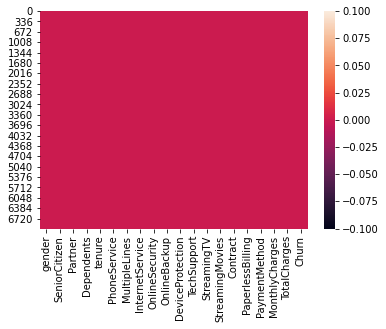

In [17]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

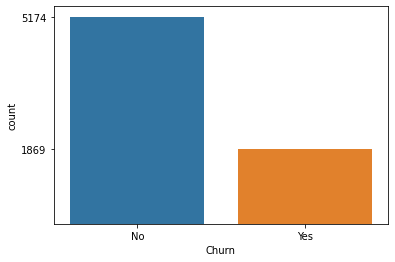

In [18]:
#we predict churn (target)
#how many 'yes' and 'no' in target column churn(loss of customer) in 
#visualize form then use inbuilt method countplot() because data is categorical
sns.countplot(data=df,x='Churn')
c=df["Churn"].value_counts()
plt.yticks(c)
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
#separate numerical type column and object type column from dataset and hold
#this data into new dataset named as df_num and df_cat respectively
df_num=df.select_dtypes(["float64","int64"])
df_cat=df.select_dtypes("object")

In [21]:
#apply LabelEncoder
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [22]:
#check
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [23]:
#to concatenate df_num,df_cat and hold in new data frame df_new
df_new = pd.concat([df_num,df_cat],axis=1)
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [24]:
#separate input and output variable from df_new dataframe: 
X=df_new.drop("Churn",axis=1) #input variable
Y=df_new["Churn"] #Target variable

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
#train : use fit()
#test : predict()
#classification problem : report generate : use classification_report()
#user defined function create
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,y_pred))
    return model

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)

from sklearn.linear_model import LogisticRegression

In [29]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [30]:
#call function 
create_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113

Confusion Matrix : 
[[1398  187]
 [ 220  308]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#Here data is imbalance means more difference between yes and no data of
#target
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [32]:
#Here No : Majority class   and yes : Minority class  means data is imbalance
#so we have to balance the output variable
# to Balance the target variable then used sampling technique : -
#There are 2 types of sampling technique : -
# 1. Random Under Sampling
# 2. Random over sampling

In [33]:
#First install imblearn  inbuilt package of python but not installed in juypter notebook
#we install the package imblearn  for sampling technique
#!pip install imblearn

In [34]:
#First install imblearn  inbuilt package of python but not installed in juypter notebook
#we install the package imblearn  for sampling technique
#!pip install imblearn




'''If you have basically reducing the majority class that is known as Uns=der sampling 
and if you are increasing the minority class that is known as over sampling '''


In [35]:

 #If you have basically reducing the majority class that is known as Under sampling 

from imblearn.under_sampling import RandomUnderSampler

In [36]:
#if converts majority class to minority class  then use RandomUnderSampler 
#Here in this dataset : Majority class : No  and Minority class : Yes
#create object of  RandomUnderSampler() class
rus = RandomUnderSampler()

In [37]:
#we have target : 70% : Y_train means training data and 30# : Y_test means testing data
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [38]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass training data
#we have X_train and Y_train (70%)
X_sample_train,Y_sample_train = rus.fit_sample(X_train,Y_train) 

In [39]:
#check 
pd.Series(Y_sample_train).value_counts()

1    1341
0    1341
dtype: int64

In [40]:
#Testing data 30% 
pd.Series(Y_test).value_counts() #this is unbalance 

0    1585
1     528
Name: Churn, dtype: int64

In [41]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass testing data
#we have X_test and Y_test (70%)
X_sample_test,Y_sample_test = rus.fit_sample(X_test,Y_test) 

In [42]:
#Testing data 30% 
pd.Series(Y_sample_test).value_counts() #this is unbalance 

1    528
0    528
dtype: int64

In [43]:
#we train the model with the help og Logistic regression after apply randomundersampler
#we create the object of Logistic Regression class
lr=LogisticRegression()

In [44]:
#train : use fit()
#test : predict()
#classification problem : report generate : use classification_report()
#user defined function create
def create_model1(model):
    model.fit(X_sample_train,Y_sample_train)#we train the model
    y_pred=model.predict(X_sample_test) #test
    print(classification_report(Y_sample_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_sample_test,y_pred))
    return model

In [45]:

#call function
create_model1(lr)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       528
           1       0.76      0.81      0.78       528

    accuracy                           0.77      1056
   macro avg       0.77      0.77      0.77      1056
weighted avg       0.77      0.77      0.77      1056

Confusion Matrix : 
[[390 138]
 [102 426]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
#Apply decisionTreeClassifier : this is select algorithm of classification ,Its help to select imp
#features to predict the o/p , not done manually data analysis to slect imp features
from sklearn.tree import DecisionTreeClassifier

In [47]:
#create the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier() #by default gini index method to select imp features

In [48]:
#call function create_model1
dt1=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       528
           1       0.69      0.67      0.68       528

    accuracy                           0.68      1056
   macro avg       0.68      0.68      0.68      1056
weighted avg       0.68      0.68      0.68      1056

Confusion Matrix : 
[[368 160]
 [173 355]]


In [49]:
#here recall for 1 : 0.71 it is good but not better means model is overfit
dt1.feature_importances_ # to show reduction of all input features

array([0.01331994, 0.10980302, 0.22855825, 0.18811384, 0.02976109,
       0.02057844, 0.0130616 , 0.00671514, 0.01786654, 0.0082016 ,
       0.01506055, 0.01182732, 0.00882496, 0.02233424, 0.01159684,
       0.01401986, 0.2134924 , 0.02316283, 0.04370153])

In [50]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [51]:
from sklearn import tree

In [52]:
features=X.columns

In [53]:
'''fig=plt.figure(figsize=(23,25))
_=tree.plot_tree(dt1,feature_names=features,filled=True)'''

'fig=plt.figure(figsize=(23,25))\n_=tree.plot_tree(dt1,feature_names=features,filled=True)'

In [54]:
#recall =0.70 means model is overfit , to reduced / remove overfit problem so apply pruning technique
#in decisiontreeclassifier class
#1. max_depth parameter : it cannot >8 
#create the object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(max_depth=4) #by default gini index

In [55]:
#call function 
dt2=create_model1(dt2)

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       528
           1       0.74      0.79      0.76       528

    accuracy                           0.75      1056
   macro avg       0.76      0.75      0.75      1056
weighted avg       0.76      0.75      0.75      1056

Confusion Matrix : 
[[382 146]
 [113 415]]


In [56]:
F=dt2.feature_importances_
print(np.round(F,2))

[0.   0.08 0.14 0.06 0.   0.   0.   0.02 0.02 0.02 0.   0.   0.   0.02
 0.   0.01 0.63 0.   0.  ]


In [57]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [58]:
'''fig=plt.figure(figsize=(23,25))
_=tree.plot_tree(dt2,feature_names=features,filled=True)'''

'fig=plt.figure(figsize=(23,25))\n_=tree.plot_tree(dt2,feature_names=features,filled=True)'

In [59]:
#Ada Boost apply : - This is ensembling technique 
from sklearn.ensemble import AdaBoostClassifier

In [60]:
#create the object of AdaBoostClassifier 
ada=AdaBoostClassifier(n_estimators=85) #n_estimators=100 : this is parameter (it is used for iteration)
#we define 100 , can be <=100 ,adaboost creates a decisionstump(decisiontree)

In [61]:
#call function after apply randomundersampler 
create_model1(ada)

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       528
           1       0.76      0.82      0.79       528

    accuracy                           0.78      1056
   macro avg       0.78      0.78      0.78      1056
weighted avg       0.78      0.78      0.78      1056

Confusion Matrix : 
[[388 140]
 [ 94 434]]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=85, random_state=None)

In [62]:
#2. Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier 

In [63]:
#create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=75) #no. of iterations <=100 use algo. decisiontreeclassifier

In [64]:
#call function
create_model1(gbc)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       528
           1       0.76      0.82      0.79       528

    accuracy                           0.78      1056
   macro avg       0.78      0.78      0.78      1056
weighted avg       0.78      0.78      0.78      1056

Confusion Matrix : 
[[389 139]
 [ 93 435]]


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=75,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [65]:
#Extreme gradient Boosting (XGB) : it a better version of Gradient boosting
from xgboost import XGBClassifier  #call xgboost inbuilt package 

In [66]:
#create the object of XGBClassifier class
xgb=XGBClassifier(n_estimators=100,reg_alpha=1) #reg_alpha=1 means automatic handle overfitting situation and
#outlier 

In [67]:
#call function
create_model1(xgb)

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       528
           1       0.76      0.83      0.80       528

    accuracy                           0.79      1056
   macro avg       0.79      0.79      0.79      1056
weighted avg       0.79      0.79      0.79      1056

Confusion Matrix : 
[[391 137]
 [ 89 439]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [68]:
#Apply another ensembling tech :  randomforesttree : use decisiontree
from sklearn.ensemble import RandomForestClassifier  #use decisiontree

In [69]:
#create object of RandomForestClassifier class
rfc=RandomForestClassifier(n_estimators=100,max_features=2,random_state=1)#here n_estimators is a parameter
#which show no. of decisiontree (how many decisiontree) and max_features means max imp input select
X.shape

(7043, 19)

In [70]:

#call function
create_model1(rfc)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       528
           1       0.76      0.80      0.78       528

    accuracy                           0.77      1056
   macro avg       0.77      0.77      0.77      1056
weighted avg       0.77      0.77      0.77      1056

Confusion Matrix : 
[[395 133]
 [107 421]]


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [71]:
#Random Over Sampling : - we increase the minority class means creates the duplicate rows of yes class (minority)
#class and equal to majority class means no class 
#If we are increasing the minority class that is known as over sampling .
#call class inbuilt class RandomOverSampling : - define in imblearn package 

from imblearn.over_sampling import RandomOverSampler

In [72]:
#create object of  RandomOverSampler() class
ros = RandomOverSampler()

In [73]:
#fit_sample() inbuilt function which define RandomOverSampler class and pass training data
#we have X_train and Y_train (70%)
X_sample_train1,Y_sample_train1 = ros.fit_sample(X_train,Y_train) 

In [74]:
#check 
pd.Series(Y_sample_train1).value_counts()

1    3589
0    3589
dtype: int64

In [75]:
#Testing data 30% 
pd.Series(Y_test).value_counts() #this is unbalance 

0    1585
1     528
Name: Churn, dtype: int64

In [76]:
#fit_sample() inbuilt function which define RandomUnderSampler class and pass testing data
#we have X_test and Y_test (70%)
X_sample_test1,Y_sample_test1 = ros.fit_sample(X_test,Y_test) 

In [77]:
#Testing data 30% 
pd.Series(Y_sample_test1).value_counts() #this is unbalance 

1    1585
0    1585
dtype: int64

In [78]:
#train : use fit()
#test : predict()
#classification problem : report generate : use classification_report()
#user defined function create
def create_model2(model):
    model.fit(X_sample_train1,Y_sample_train1)#we train the model
    y_pred=model.predict(X_sample_test1) #test
    print(classification_report(Y_sample_test1,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_sample_test1,y_pred))
    return model

In [79]:
#we train the model with the help og Logistic regression after apply randomOverrsampler
#we create the object of Logistic Regression class
#Use base line model of classification algorithm : Logistic Regression
lr1=LogisticRegression()

In [80]:
#call function
create_model2(lr1)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1585
           1       0.76      0.81      0.78      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

Confusion Matrix : 
[[1174  411]
 [ 298 1287]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
#create the object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier() #by default gini index method to select imp features

In [82]:
#call function
create_model2(dt3)

              precision    recall  f1-score   support

           0       0.63      0.82      0.71      1585
           1       0.74      0.52      0.61      1585

    accuracy                           0.67      3170
   macro avg       0.68      0.67      0.66      3170
weighted avg       0.68      0.67      0.66      3170

Confusion Matrix : 
[[1294  291]
 [ 761  824]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
#create the object of DecisionTreeClassifier class
dt4=DecisionTreeClassifier(max_depth=4) #by default gini index method to select imp features

In [84]:
#call function
create_model2(dt4)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1585
           1       0.75      0.80      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

Confusion Matrix : 
[[1171  414]
 [ 317 1268]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
#create the object of AdaBoostClassifier 
ada1=AdaBoostClassifier(n_estimators=25) #n_estimators=100 : this is parameter (it is used for iteration)
#we define 100 , can be <=100 ,adaboost creates a decisionstump(decisiontree)

In [86]:
#call function
create_model2(ada1)

              precision    recall  f1-score   support

           0       0.81      0.72      0.77      1585
           1       0.75      0.83      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

Confusion Matrix : 
[[1149  436]
 [ 264 1321]]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=25, random_state=None)

In [87]:
#create the object of GradientBoostingClassifier class
gbc1=GradientBoostingClassifier(n_estimators=30) #no. of iterations <=100 use algo. decisiontreeclassifier

In [88]:
#call function
create_model2(gbc1)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1585
           1       0.75      0.81      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

Confusion Matrix : 
[[1156  429]
 [ 306 1279]]


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
#create the object of XGBClassifier class
xgb1=XGBClassifier(n_estimators=25,reg_alpha=1) #reg_alpha=1 means automatic handle overfitting situation and
#outlier 

In [90]:
#call function
create_model2(xgb1)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1585
           1       0.75      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

Confusion Matrix : 
[[1149  436]
 [ 284 1301]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [91]:
#create object of RandomForestClassifier class
rfc1=RandomForestClassifier(n_estimators=100,max_features=4,random_state=1)#here n_estimators is a parameter
#which show no. of decisiontree (how many decisiontree) and max_features means max imp input select
X.shape

(7043, 19)

In [92]:
#call function
create_model2(rfc1)

              precision    recall  f1-score   support

           0       0.69      0.84      0.76      1585
           1       0.80      0.62      0.70      1585

    accuracy                           0.73      3170
   macro avg       0.74      0.73      0.73      3170
weighted avg       0.74      0.73      0.73      3170

Confusion Matrix : 
[[1335  250]
 [ 602  983]]


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

# conclusion:
Extreme gradient Boosting (XGBClassifier) algorithom with RandomUnderSampler technique is best for this dataset
